In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
from google.colab import files
uploaded = files.upload()

Saving CAR DETAILS FROM CAR DEKHO.csv to CAR DETAILS FROM CAR DEKHO (1).csv


In [60]:
import io
car_data = pd.read_csv(io.BytesIO(uploaded['CAR DETAILS FROM CAR DEKHO.csv']))

In [61]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [62]:
# checking the number of rows and columns
car_data.shape

(4340, 8)

In [63]:
# checking the number of missing values
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

## Exploratory Data Analysis (EDA)

Text(0.5, 0, 'No. of cars')

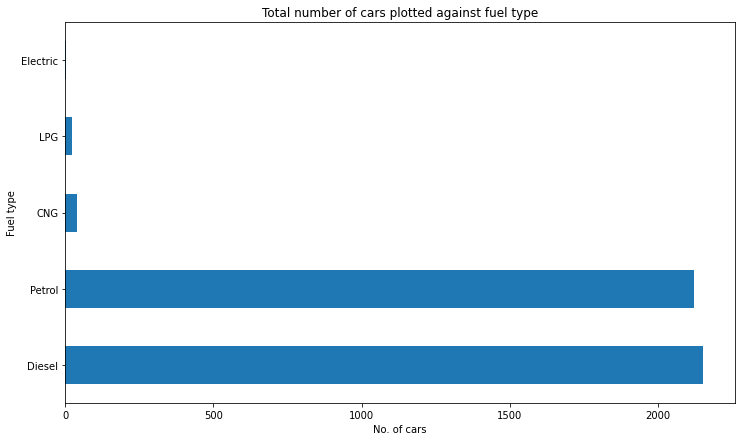

In [64]:
car_data.fuel.value_counts().plot(kind='barh', stacked=True, legend=False, figsize=(12, 7))
plt.title("Total number of cars plotted against fuel type")
plt.ylabel("Fuel type")
plt.xlabel("No. of cars")


Text(0.5, 0, 'No. of cars')

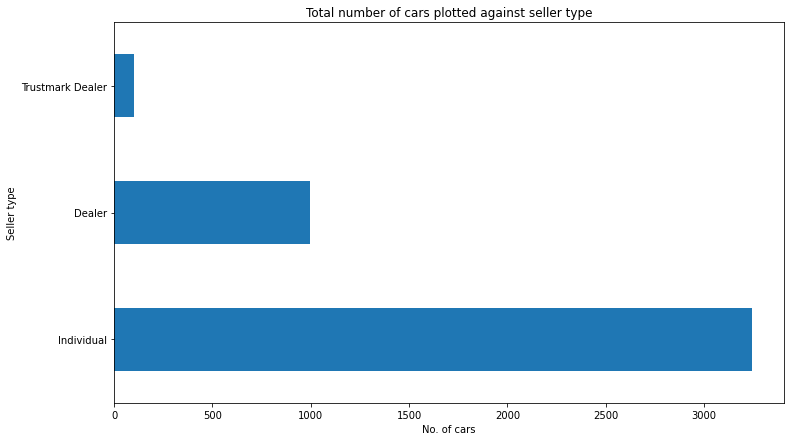

In [65]:
car_data.seller_type.value_counts().plot(kind='barh', stacked=True, legend=False, figsize=(12, 7))
plt.title("Total number of cars plotted against seller type")
plt.ylabel("Seller type")
plt.xlabel("No. of cars")


Text(0.5, 0, 'No. of cars')

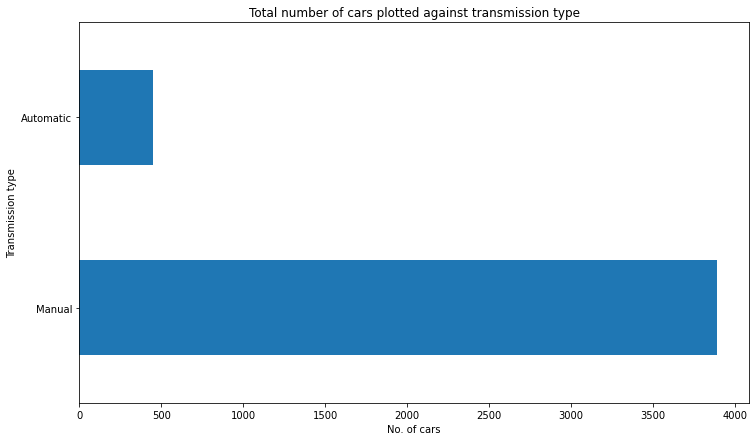

In [66]:
car_data.transmission.value_counts().plot(kind='barh', stacked=True, legend=False, figsize=(12, 7))
plt.title("Total number of cars plotted against transmission type")
plt.ylabel("Transmission type")
plt.xlabel("No. of cars")


Encoding the categorical variables

In [67]:
# encoding "Fuel_Type" Column
car_data.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2, 'LPG':3, 'Electric': 4}},inplace=True)

# encoding "Seller_Type" Column
car_data.replace({'seller_type':{'Individual':0,'Dealer':1, 'Trustmark Dealer':2}},inplace=True)

# encoding "Transmission" Column
car_data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding owner column
car_data.replace({'owner':{'First Owner':0,'Second Owner':1, 'Third Owner':2,'Fourth & Above Owner':3, 'Test Drive Car':0}},inplace=True)

car_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,0,0,0,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,0,0,0,1
4337,Maruti 800 AC BSIII,2009,110000,83000,1,0,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,0,0,0,0


Splitting the data

In [68]:
X = car_data.drop(['name','selling_price'],axis=1)
y = car_data['selling_price']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2)

## Model Training

Linear Regression

In [80]:
# loading the linear regression model
model_1 = LinearRegression()

In [81]:
model_1.fit(X_train,y_train)

LinearRegression()

Model Evaluation

In [82]:
# prediction on Training data
training_data_prediction = model_1.predict(X_train)

In [83]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.44323121834404644


Visualize the actual prices and Predicted prices

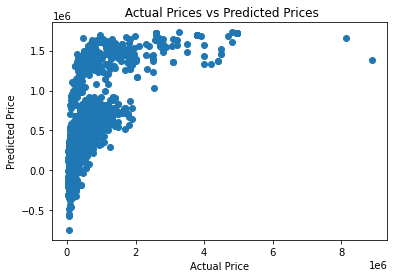

In [84]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [85]:
# prediction on Training data
test_data_prediction = model_1.predict(X_test)

In [87]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5217320460142978


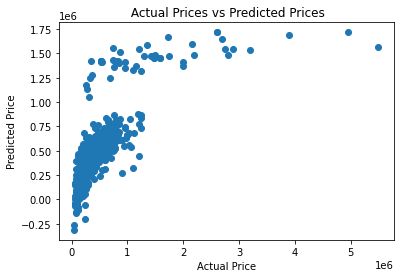

In [89]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [90]:
# loading the linear regression model
model_2 = Lasso()

In [91]:
model_2.fit(X_train,y_train)

Lasso()

Model Evaluation

In [92]:
# prediction on Training data
training_data_prediction = model_2.predict(X_train)

In [93]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4432312182917525


Visualize the actual prices and Predicted prices

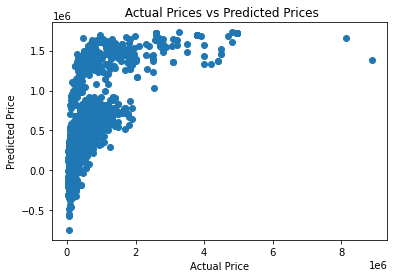

In [94]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [95]:
# prediction on Training data
test_data_prediction = model_2.predict(X_test)

In [96]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5217312897130745


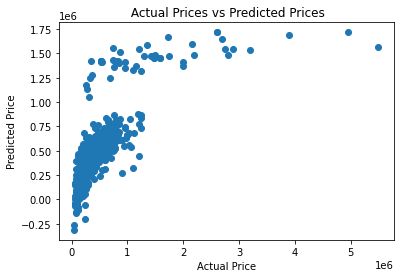

In [97]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()